# Module 01 - PyTorch Workflow

Lets's explore an example PyTorch end-to-end workflow

In [1]:
what_were_covering = {1: 'data (prepare and load)',
                    2: 'build model',
                    3: 'fitting model to data (training)',
                    4: 'making predictions (inference)',
                    5: 'saving and loading the model',
                    6: 'putting it all together'}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting model to data (training)',
 4: 'making predictions (inference)',
 5: 'saving and loading the model',
 6: 'putting it all together'}

In [2]:
# Torch Libraries
import torch
import torch.nn as nn # nn contains all pytorch building blocks for Neural Networks

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

torch.__version__

'2.7.0+cu118'

### 1. Data (preparing and loading)
Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (Youtube)
* Audio
* etc...

Machine Learning is a game of 2 parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in the numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

#### 1.1. Creating **known** Dataset

In [3]:
# Create *known* parameters
# Linear Regression: Y = mX + b
weight = 0.7 # m
bias = 0.3 # b

# Create
start = 0; end = 1; step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias
X[:10], len(X), y[:10], len(y)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 50,
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50)

#### 1.2. Spliting data into training and tests sets

--> **Generalization:** Ability of a model to perform well on data it hasn't seen before.

Let's create a training and tets set with the data.

In [4]:
# Create a train/tests split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data? Our motto!

**Visualize, Visualize, Visualize!**

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    '''Plots training data, test data and compares predictions'''

    plt.figure(figsize=(6,4))

    plt.scatter(train_data, train_labels, c='b', s=6, label='Training Data')
    plt.scatter(test_data, test_labels, c='g', s=6, label='Test Data')
    plt.scatter(test_data, predictions, c='r', s=5, marker='*', label='Predictions') if (predictions is not None) else None
    plt.legend()

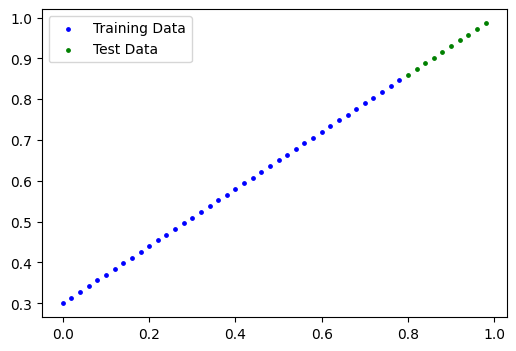

In [6]:
plot_predictions(X_train, y_train, X_test, y_test)

### 2. Build model
Our first PyTorch model! We'll use Object Oriented Programming (OOP)

#### 2.1. Class Building

In [7]:
# Create a Linear Regression Model Class

class Linear_Regression_Model(nn.Module):

    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


#### 2.2. Checking contents of a Python Model



In [8]:
# Create a random seed
my_seed = 42; torch.manual_seed(my_seed)

# Create an Instance of the model
model_0 = Linear_Regression_Model()

# Check out the parameters mode.state_dict()
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

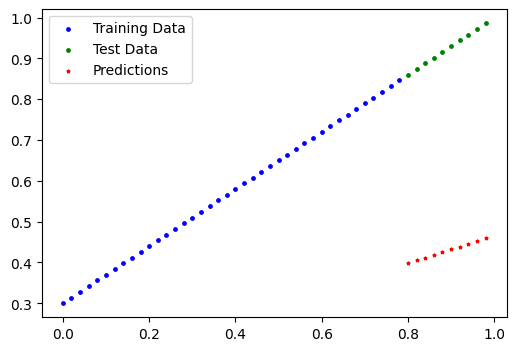

In [9]:
# Make and Plot Predictions --> torch.inference_mode() - It turns off the gradient tracking. It allows the code to run faster, since python is keeping tracking of less data.
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

plot_predictions(predictions=y_preds)
 


### 3. Train & Eval a Model

The whole idea of training is for a model to move from some **unknown** parameters to some **known** parameters. In other words, from a **poor** representation to a **better** representation.

To measure how wrong our model predictions are we can use a Loss Function (criterion) - L1 (MAE), L2 (MSE), BinaryCrossEntropy, CrossEntropy (for categorical classification).

Things we need to learn:
* **Loss Function (Criterion)**
* **Optimizer:** How to optimize parameters `params` with a certain learning rate `lr`

We'll also need:
* **Training Loop:** 

    0. *Loop* through the data, both en epochs and batches.
    1. *Outputs Computation:* Forward Propagation to Compute `outputs`.
    2. *Loss Calculation*: Use Loss Function (criterion) to calculate `Loss` or Error, by comparing `predictions` with `targets`.
    3. *Optimizer Zero Grad*
    4. *Loss Backward:* BackPropagation.
    5. *Optimizer Step:* Use `optimizer` to update `parameters`
* **Testing Loop:**


#### 3.1. Training & Validation

In [10]:
# Setup a Loss Function (Criterion) & an Optimizer
criterion = nn.L1Loss() 
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

epochs = 200

# Tracking Experiments
epoch_count = []
train_loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
    # Set model to training mode
    model_0.train() # train mode sets all parameters that require gradient tracking to actually track their gradients.
    
    outputs = model_0(X_train)          # 1. Output Calculation
    loss = criterion(outputs, y_train)  # 2. Loss Calculation
    optimizer.zero_grad()               # 3. ZeroGrad
    loss.backward()                     # 4. Back Propagation
    optimizer.step()                    # 5. Update parameters with Gradient Descent

    #------------------------------------------------------------------------------------
    model_0.eval()                  # Sets model to evaluation mode (e.g., disables dropout
    with torch.inference_mode():    # Turns Off Gradient Tracking for faster computation..
        
        test_output = model_0(X_test)
        test_loss = criterion(test_output, y_test)

    if (epoch) % max(1, epochs // 10) == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss)
        test_loss_values.append(test_loss)

        print(f'Epoch: {epoch} | Loss; {loss} | Test Loss: {test_loss}')
        print(model_0.state_dict())


print(f'\n{'-'*80}\n\nFinal Loss: {loss}')
print(model_0.state_dict())

Epoch: 0 | Loss; 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 20 | Loss; 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 40 | Loss; 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 60 | Loss; 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch: 80 | Loss; 0.03132382780313492 | Test Loss: 0.07232122868299484
OrderedDict({'weights': tensor([0.5459]), 'bias': tensor([0.3648])})
Epoch: 100 | Loss; 0.024458957836031914 | Test Loss: 0.05646304413676262
OrderedDict({'weights': tensor([0.5800]), 'bias': tensor([0.3503])})
Epoch: 120 | Loss; 0.01758546568453312 | Test Loss: 0.04060482233762741
OrderedDict({'weights': tensor([0.6141]), 'bias': tensor([0.3358])})
Epoch: 140 | Loss;

#### 3.2. Training vs Validation Loss Curves

Text(0.5, 1.0, 'Training and Validation Loss Curves')

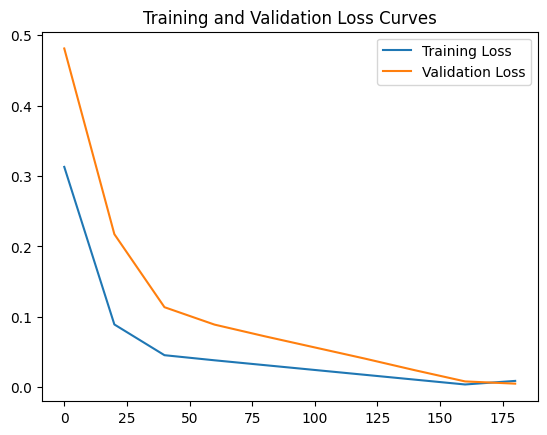

In [11]:
train_loss_values_np = np.array(torch.tensor(train_loss_values).numpy())
test_loss_values_np = np.array(torch.tensor(test_loss_values).numpy())

plt.plot(epoch_count, train_loss_values_np, label='Training Loss')
plt.plot(epoch_count, test_loss_values_np, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss Curves')

#### 3.3. Plotting Predictions

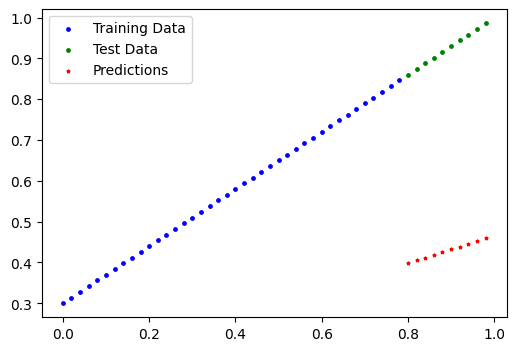

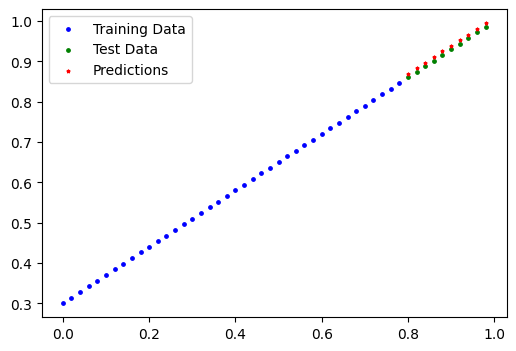

In [12]:
# Plotting
with torch.inference_mode():
    y_preds_new = model_0(X_test)
plot_predictions(predictions=y_preds)
plot_predictions(predictions=y_preds_new)

### 4. Saving/Loading a Model in Pytorch
There are 3 main methods I should know about for saving and loading models in PyTorch.
1. `torch.save()` - allows you save a PyTorch object in Python's pickle format.
2. `torch.load()` - allows you load a saved PyTorch object.
3. `torch.nn.Module.loas_state_dict()` - allos you to load a model's saved state dictionary (learned parameters).

#### 4.1. Saving

In [13]:
# Saving our PyTorch Model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# 3. Save model state_dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_0.pth


#### 4.2. Loading the Model State Dict

Since we only saved the `state_dict()`, we need to create a new instance of our model class and lad the saved `state_dict()` into that one.

In [14]:
# To Load in a Saved state_dict, we need to create a new instance of the model class.

loaded_model_0 = Linear_Regression_Model()                      # New Model Instance
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))   # Load state_dict into new model's.
loaded_model_0.state_dict()                                     # Display them

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [15]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_outputs = loaded_model_0(X_test)


y_preds_new == loaded_outputs

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 5. Putting it all together
Let's go back through the steps above and see it all in one place. 

#### 5.0. Libraries & Device-Agnostic Code

In [16]:
# Libraries

# PyTorch
import torch
import torch.nn as nn

# Data Visualize/Processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Path
from pathlib import Path

# Important 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'PyTorch Version: {torch.__version__}'); print(f'Device: {device}')
my_seed = 42


PyTorch Version: 2.7.0+cu118
Device: cuda


####  5.1. Data

(torch.Size([1000, 1]),
 torch.Size([1000, 1]),
 torch.Size([700, 1]),
 torch.Size([700, 1]),
 torch.Size([100, 1]),
 torch.Size([100, 1]),
 torch.Size([200, 1]),
 torch.Size([200, 1]))

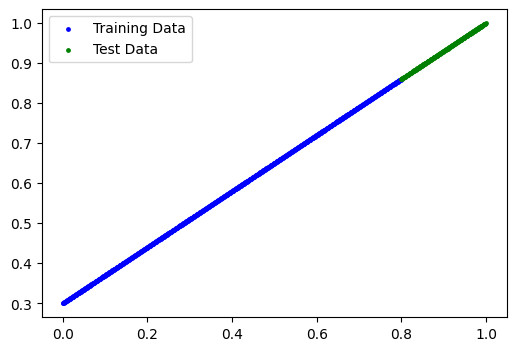

In [17]:
# Create Data with Linear regression --> y = m*x + b

# Data Parameters
start=0; end= 1; step_size = 0.001
m = 0.7; b = 0.3

# Create Data
X = torch.arange(start, end, step_size).unsqueeze(dim=1)
y = m*X + b

# Spliting Parameters
train_size = 0.7; valid_size = 0.1; n = len(X)
train_split_idx = int(n*train_size)
valid_split_idx = train_split_idx+int(n*valid_size)

# Split Datasets
X_full_train = X[:valid_split_idx,:]; y_full_train = y[:valid_split_idx,:]
X_train = X[:train_split_idx,:]; y_train = y[:train_split_idx,:]
X_val = X[train_split_idx:valid_split_idx,:]; y_val = y[train_split_idx:valid_split_idx,:]
X_test = X[valid_split_idx:,:]; y_test = y[valid_split_idx:,:]

# Cell's Outputs
plot_predictions(X_full_train, y_full_train, X_test, y_test)
X.shape, y.shape, X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

#### 5.2 Building a PyTorch Linear Model Class

In [18]:
# Build a PyTorch Linear Model Class
class Linear_Regression_ModelV2(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.linear_layer(x)
        return x

In [19]:
torch.manual_seed(my_seed)
model_1 = Linear_Regression_ModelV2()
model_1.to(device)
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

#### 5.3. Training & Validation of the Model

In [20]:
# Training Model
torch.manual_seed(my_seed)

# Training HyperParameters
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)
epochs = 200

# Training Lists
epochs_list = []
train_loss_list = []
val_loss_list = []

# 
X_full_train = X_full_train.to(device); y_full_train = y_full_train.to(device)
X_train = X_train.to(device); y_train = y_train.to(device)
X_val = X_val.to(device); y_val = y_val.to(device)
X_test = X_test.to(device); y_test = y_test.to(device)

# Training Loop
for epoch in range(epochs):
    model_1.train()

    outputs = model_1(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #---------------------------------------------
    model_1.eval()
    with torch.inference_mode():
        val_outputs = model_1(X_val)
        val_loss = criterion(val_outputs, y_val)
    
    if (epoch % max(1, epochs // 10) == 0):
        print(f'Epoch: {epoch:5} | Train_Loss: {loss.item():.6f} | Val_Loss: {val_loss.item():.6f}')
        
        train_loss_list.append(loss.item())
        val_loss_list.append(val_loss.item())
        epochs_list.append(epoch)


print(f'Epoch: {epoch:5} | Train_Loss: {loss.item():.6f} | Val_Loss: {val_loss.item():.6f}')
print(f'{'-'*60}\n\nFinal Parameters: {model_1.state_dict()}')

     
    

Epoch:     0 | Train_Loss: 0.552564 | Val_Loss: 0.565760
Epoch:    20 | Train_Loss: 0.328134 | Val_Loss: 0.313370
Epoch:    40 | Train_Loss: 0.103705 | Val_Loss: 0.060981
Epoch:    60 | Train_Loss: 0.015516 | Val_Loss: 0.032910
Epoch:    80 | Train_Loss: 0.010092 | Val_Loss: 0.021258
Epoch:   100 | Train_Loss: 0.004667 | Val_Loss: 0.009533
Epoch:   120 | Train_Loss: 0.002383 | Val_Loss: 0.011965
Epoch:   140 | Train_Loss: 0.002383 | Val_Loss: 0.011965
Epoch:   160 | Train_Loss: 0.002383 | Val_Loss: 0.011965
Epoch:   180 | Train_Loss: 0.002383 | Val_Loss: 0.011965
Epoch:   199 | Train_Loss: 0.008838 | Val_Loss: 0.000655
------------------------------------------------------------

Final Parameters: OrderedDict({'linear_layer.weight': tensor([[0.6957]], device='cuda:0'), 'linear_layer.bias': tensor([0.3039], device='cuda:0')})


Test_Loss: 0.000216


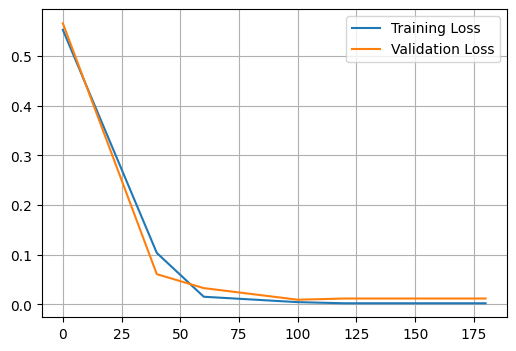

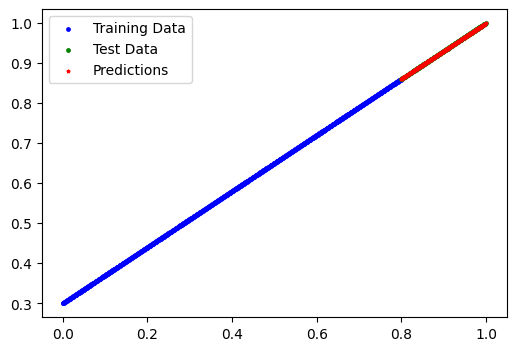

In [21]:
# Plotting Training vs Validation Loss
plt.figure(figsize=(6,4))
plt.plot(epochs_list, train_loss_list, label='Training Loss')
plt.plot(epochs_list, val_loss_list, label='Validation Loss')
plt.legend(); plt.grid()

# Testing
with torch.inference_mode():
    test_outputs = model_1(X_test)
    test_loss = criterion(test_outputs, y_test)
print(f'Test_Loss: {test_loss:5f}')

# Plotting Predictions
plot_predictions(train_data= torch.Tensor.cpu(X_full_train), train_labels=torch.Tensor.cpu(y_full_train), 
                 test_data = torch.Tensor.cpu(X_test), test_labels = torch.Tensor.cpu(y_test), predictions=torch.Tensor.cpu(test_outputs))

#### 5.4. Saving & Loading a Model

In [22]:
# Saving the Model
from pathlib import Path

PATH_FOLDER = Path('models'); PATH_FOLDER.mkdir(parents=True, exist_ok=True)
MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = PATH_FOLDER / MODEL_NAME

torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

In [23]:
# Loading the Model
loaded_model_1 = Linear_Regression_ModelV2().to(device)
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print(loaded_model_1.state_dict())

OrderedDict({'linear_layer.weight': tensor([[0.6957]], device='cuda:0'), 'linear_layer.bias': tensor([0.3039], device='cuda:0')})


In [24]:
# Use the Loaded Model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_outputs = loaded_model_1(X_test)
    loaded_model_1_loss = criterion(loaded_outputs, y_test)

(loaded_outputs == test_outputs).sum() == len(X_test)

tensor(True, device='cuda:0')